In [29]:
import pandas as pd
db = pd.read_csv('adult.csv', names=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","target"]).dropna()
descriptive = db.iloc[:,0:14].values
target = db.iloc[:,14].values

In [30]:
#Data visualization
#db.describe()
#db.head()
#print("Descriptive:")
#print(descriptive)
#print("Target")
#print(target)

In [31]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
descriptive[:,0] = le.fit_transform(descriptive[:,0])
descriptive[:,1] = le.fit_transform(descriptive[:,1])
descriptive[:,2] = le.fit_transform(descriptive[:,2])
descriptive[:,3] = le.fit_transform(descriptive[:,3])
descriptive[:,4] = le.fit_transform(descriptive[:,4])
descriptive[:,5] = le.fit_transform(descriptive[:,5])
descriptive[:,6] = le.fit_transform(descriptive[:,6])
descriptive[:,7] = le.fit_transform(descriptive[:,7])
descriptive[:,8] = le.fit_transform(descriptive[:,8])
descriptive[:,9] = le.fit_transform(descriptive[:,9])
descriptive[:,10] = le.fit_transform(descriptive[:,10])
descriptive[:,11] = le.fit_transform(descriptive[:,11])
descriptive[:,12] = le.fit_transform(descriptive[:,12])
descriptive[:,13] = le.fit_transform(descriptive[:,13])

In [32]:
#Split Dataset
percentagem = 0.5
from sklearn.model_selection import train_test_split
#change this line for 0.15, 0.30, 0.50
descriptiveTraining, descriptiveTest, targetTraining, targetTest = train_test_split(descriptive,target,test_size = percentagem, random_state = 0)

#print(descriptiveTraining)
#print(descriptiveTest)

In [33]:
#Naive Bayes Algorithm & Test
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(descriptiveTraining, targetTraining)
prediction = classifier.predict(descriptiveTest)

In [34]:
#Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
accuracy = accuracy_score(targetTest,prediction)
matrix = confusion_matrix(targetTest,prediction)
print("Accuracy:")
print(accuracy )
print("Confusion matrix:")
print(matrix)
report = classification_report(targetTest,prediction)
print("Classificatio report:")
print(report)

Accuracy:
0.7724341256679566
Confusion matrix:
[[11281  1042]
 [ 2663  1295]]
Classificatio report:
              precision    recall  f1-score   support

       <=50K       0.81      0.92      0.86     12323
        >50K       0.55      0.33      0.41      3958

    accuracy                           0.77     16281
   macro avg       0.68      0.62      0.64     16281
weighted avg       0.75      0.77      0.75     16281



Text(0, 0.5, 'Mean Error')

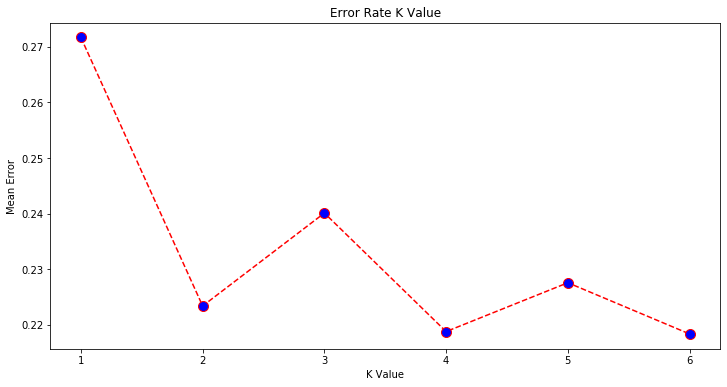

In [35]:
import matplotlib.pyplot as plt
import numpy as np
error = []

# Calculating error for K values between 1 and 8
for i in range(1, 7):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(descriptiveTraining, targetTraining)
    pred_i = knn.predict(descriptiveTest)
    error.append(np.mean(pred_i != targetTest))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 7), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')